In [1]:
import os
import pandas as pd
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
from bqplot import pyplot as plt # visualization lib built on top of ipywidgets
import ipywidgets as widgets
from ipywidgets import interact
#%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import datetime
import folium
from ipywidgets import IntSlider, Output
from ipywidgets import FileUpload
from IPython.display import display, Markdown, clear_output

from PIL import Image
import math
from matplotlib.colors import ListedColormap
from matplotlib import pyplot
import matplotlib as mpl
import datetime as datetime

In [108]:
df = pd.read_csv('df_mean_std_missing') # read in the aggregated csv file

# reshape the file to the original 2-d array format for plotting
image_mean = np.array(df['mean']).reshape([2946, 2718]) 
image_std = np.array(df['std']).reshape([2946, 2718])
image_missing = np.array(df['missing']).reshape([2946, 2718])

In [34]:
df_test = pd.read_csv('df_select.csv') # read in the position which user selected
df_test = df_test.sort_values(by = 'DateTime')

In [46]:
df_test['date_time'] = pd.to_datetime(df_test['DateTime'])

df_test['month_year'] = pd.to_datetime(df_test['date_time']).dt.to_period('M')

df_test_month = df_test.groupby('month_year')['1356881'].mean()

In [112]:
missing_percentage = df_test_month[42:].isna().sum() / len(df_test_month[42:])

In [83]:
df_interpolated = df_test_month.interpolate(method ='linear', limit_direction ='forward')

test = pd.DataFrame(df_interpolated)

test = test.reset_index()

test['month_year'] = test.month_year.astype(str)

In [103]:
test = test[42:]

![logo](https://66.media.tumblr.com/41a1ce55dfc366dddeb8191808e1b738/2871cadea7ec24d9-4c/s250x400/a303619e613678b393a708ac7c552e5a5577c38b.png)

## <font color='green'>Return Corals To Their Homes

## <font color='orange'>Area of Interest - Golfo Dulce

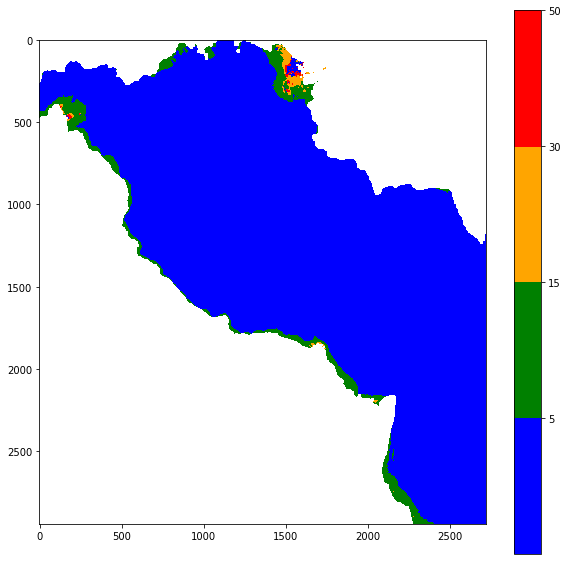

In [121]:
# make a color map of fixed colors
cmap = mpl.colors.ListedColormap(['blue','green','orange','red'])
bounds=[0,5,15,30,50]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#fig, ax = subplots(figsize=(10,5))

plt.figure(figsize=(10,10))

# tell imshow about color map so that only set colors are used
img = pyplot.imshow(image_mean, #[0:50, 200:250], #interpolation='nearest',
                    cmap = cmap,norm=norm);

# make a color bar
pyplot.colorbar(img,cmap=cmap,
                norm=norm,boundaries=bounds,ticks=[5,15,30,50], ax=None);

#pyplot.show()

### <font color='blue'>Specify latitude and logitude for the area of interest

In [99]:
corals_latitude = widgets.Text(
    value='400',
    placeholder='Type something',
    description='latitude:',
    disabled=False)

corals_latitude

Text(value='400', description='latitude:', placeholder='Type something')

In [100]:
corals_longitude = widgets.Text(
    value='400',
    placeholder='Type something',
    description='longitude:',
    disabled=False)

corals_longitude

Text(value='400', description='longitude:', placeholder='Type something')

In [36]:
# find out position index, default latitude = 500, default longitude = 500

idx = (int(corals_latitude.value) - 1) * 2718 + int(corals_longitude.value) 

In [106]:
# create the widget calendar, other widgets saved here for future reference

text = widgets.Text(
       value='My Text',
       description='Title', )
calendar_start = widgets.DatePicker(
           description='Starting Date')
calendar_end = widgets.DatePicker(
           description='Ending Date')
slider = widgets.FloatSlider(
         value=1,
         min=0,
         max=10.0,
         step=0.1,)
menu = widgets.Dropdown(
       options=['sediment', 'vegetation'],
       value='sediment',
       description='Factors:')
checkbox = widgets.Checkbox(
           description='Check to invert',)

box1 = widgets.VBox([calendar_start, calendar_end])


# to make the date interactive, try the codes below:
#start_time = calendar_start.value
#start_month = str(start_time.year) + '-' + str(start_time.month)
#end_time = calendar_end.value
#end_month = str(end_time.year) + '-' + str(end_time.month)

start_month = '2019-07' #default
end_month = '2020-4'#default

### <font color='blue'>Specify the date range for the area of interest

In [13]:
box1

In [114]:
button1 = widgets.Button(description='Calculate sediment')
out1 = widgets.Output()
def on_button_clicked1(_):
      # "linking function with output"
        with out1:
          # what happens when we press the button
            clear_output()
            print('the average sedimentation from ' + start_month + ' to ' + end_month + ' is ' + str(round(image_mean[int(corals_latitude.value), int(corals_longitude.value)], 3)) + 'g/m3')
            print('the std sedimentation from ' + start_month + ' to ' + end_month + ' is ' + str(round(image_std[int(corals_latitude.value), int(corals_longitude.value)], 3)) + 'g/m3')
            print('the missing values from ' + start_month + ' to ' + end_month + ' is ' + str(round(missing_percentage * 100, 2)) + ' percent')


# linking button and function together using a button's method
button1.on_click(on_button_clicked1)

# displaying button and its output together
widgets.VBox([button1,out1])


In [98]:
%matplotlib inline

#plt.ioff()
button2 = widgets.Button(description='Generate trend chart')
out2 = widgets.Output()
def on_button_clicked2(_):
      # "linking function with output"
        with out2:
          # what happens when we press the button
            clear_output()
            #x = np.linspace(0, 10, 1000)
            fig, ax = plt.subplots()
            plt.plot(test['month_year'], test['1356881'])
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            plt.title('sendimentation over time')
            #plt.xlabel('months')
            plt.ylabel('actual sedimentation')
            plt.show()
# linking button and function together using a button's method
button2.on_click(on_button_clicked2)
# displaying button and its output together
vbox = widgets.VBox([button2,out2])
display(vbox)

### Other information sources#

## Coral Reef Watch

In [35]:
%%html
<iframe width="425" height="350" frameborder="0" scrolling="no" marginheight="0" marginwidth="0" src="http://pacioos.org/voyager/full.html?b=5.834901,-90.260883,12.415398,-77.351948&s=1&t=m&o=sat:4:cunit:d46a0m0x1.5&output=embed"></iframe><br /><small><a href="http://pacioos.org/voyager/index.html?b=5.834901,-90.260883,12.415398,-77.351948&s=1&t=m&o=sat:4:cunit:d46a0m0x1.5" target="_blank">View Larger Map</a></small>

In [85]:
## Resource Watch

In [79]:
#%%html
#<iframe src="https://resourcewatch.org/embed/data/explore?zoom=10&lat=8.580262690263194&lng=276.9105505943299&basemap=dark&labels=light&layers=%255B%257B%2522dataset%2522%253A%2522d553a58a-faa2-480d-b137-c96d76d5ccab%2522%252C%2522opacity%2522%253A1%252C%2522layer%2522%253A%2522ce352a4f-516e-4a00-9a94-54f2edbb618c%2522%257D%255D&page=1&sort=most-viewed&sortDirection=-1" width="100%" height="500px" frameBorder="0" />